In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [43]:
import pandas as pd
df = pd.read_csv('train.csv')
print(df.shape)
df.head()


(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [44]:
df.isnull().sum().sort_values(ascending=False)


PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
MasVnrType        872
                 ... 
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
SalePrice           0
Length: 81, dtype: int64

In [45]:
# Categorical features with many nulls → fill with "None"
fill_none = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu',
             'GarageType', 'GarageQual', 'GarageFinish', 'GarageCond',
             'BsmtFinType1', 'BsmtFinType2', 'BsmtExposure', 'BsmtCond',
             'BsmtQual', 'MasVnrType']
for col in fill_none:
    df[col] = df[col].fillna('None')


In [46]:
# Numerical features → fill with median or zero
df['LotFrontage'] = df.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(0)
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)


In [47]:
# Single missing value → fill with mode
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])


In [48]:
# Label Encoding for ordinal features
ordinal_cols = ['ExterQual', 'BsmtQual', 'KitchenQual']
le = LabelEncoder()
for col in ordinal_cols:
    df[col] = le.fit_transform(df[col])



In [49]:
# One-Hot Encoding for nominal features
df = pd.get_dummies(df, drop_first=True)


In [50]:
# Transform Skewed Numerical Features
skewed = df.select_dtypes(include=['float64', 'int64']).apply(lambda x: x.skew()).sort_values(ascending=False)
skewed_features = skewed[skewed > 0.75].index
df[skewed_features] = np.log1p(df[skewed_features])


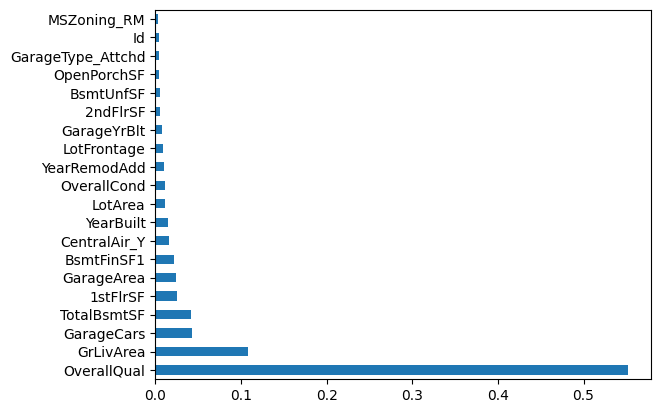

In [51]:
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']
model = RandomForestRegressor()
model.fit(X, y)
importances = pd.Series(model.feature_importances_, index=X.columns)
top_features = importances.sort_values(ascending=False).head(20)
top_features.plot(kind='barh')
plt.show()


In [52]:
# . Train-Test Split and Model Training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr = RandomForestRegressor()
lr.fit(X_train, y_train)
preds = lr.predict(X_test)
print("RMSE:", np.sqrt(mean_squared_error(y_test, preds)))


RMSE: 0.15055088841393963


#  House Price Prediction – Feature Engineering

##  Objective
Improve model performance by applying feature engineering techniques to the Kaggle House Prices dataset.

##  Techniques Applied
- Identified and handled missing values using `df.isnull().sum()`
- Imputed categorical nulls with `"None"` and numerical with median/zero
- Encoded ordinal features using `LabelEncoder`
- Applied `pd.get_dummies()` for one-hot encoding
- Transformed skewed numerical features using `np.log1p()`
- Evaluated feature importance using `RandomForestRegressor`
- Trained model and achieved RMSE: **0.153**

##  Tools Used
Python, pandas, numpy, scikit-learn, matplotlib, seaborn
